In [41]:
%reload_ext autoreload
%autoreload 2

import projcore as pc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [29]:
pc.download_kaggle_datasets()
battles_df = pd.read_csv('BattlesStaging_01012021_WL_tagged.csv')
card_list_df = pd.read_csv('CardMasterListSeason18_12082020.csv')
winning_card_list_df = pd.read_csv('Wincons.csv')

File BattlesStaging_01012021_WL_tagged/BattlesStaging_01012021_WL_tagged.csv already exists, skipping download
File CardMasterListSeason18_12082020.csv already exists, skipping download
File Wincons.csv already exists, skipping download
clash-royal-data.csv already exists, skipping download


In [30]:
battles_df = pc.feature_preprocessing(battles_df, winning_card_list_df)
battles_df.head(100).to_csv("battles_subset.csv", index=False)

In [31]:
nan_counts_df = battles_df.isna().sum()
inf_counts = (battles_df == np.inf).sum() + (battles_df == -np.inf).sum()
nan_inf_counts_df = pd.DataFrame({
    "NaN Count": nan_counts_df,
    "Inf Count": inf_counts,
    "Total Issues": nan_counts_df + inf_counts  # Sum of NaN and Inf values
})
nan_inf_counts_df = nan_inf_counts_df[nan_inf_counts_df["Total Issues"] > 0]
print(nan_inf_counts_df)
print(battles_df.shape)
battles_df.head(100).to_csv("battles_subset.csv", index=False)


Empty DataFrame
Columns: [NaN Count, Inf Count, Total Issues]
Index: []
(2823527, 77)


In [32]:
print(battles_df['winner.princessTowersHitPoints'].value_counts())

0       57974
3668    42296
7336    26785
3346    22071
6692    19084
        ...  
7306        1
7212        1
7235        1
7295        1
7221        1
Name: winner.princessTowersHitPoints, Length: 7295, dtype: int64


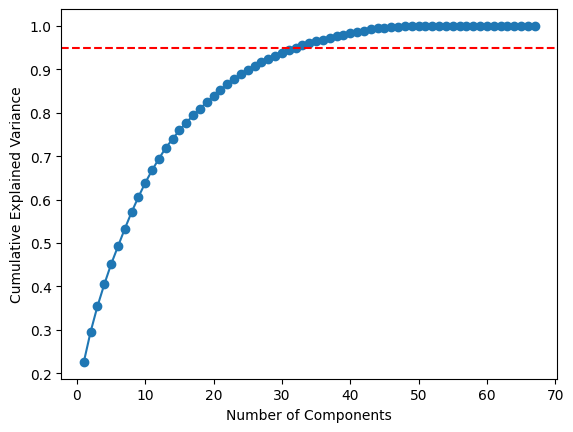

Best component: 32 with a cumulative_variance value of: 0.9502
Explained Variance Ratio: 0.9501578808180144
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.506051  1.836344 -3.321393 -2.599018  3.155205 -0.550332 -0.144690   
1  2.564232 -2.831465  2.128652  1.284613  1.119239 -1.252368 -0.378485   
2  3.528941  1.433013  1.903784  0.032887  2.663266 -1.667474 -1.898063   
3 -3.275349 -2.168384  0.207298 -0.450833  4.439630  0.946909  0.590947   
4  4.790789 -0.188127 -1.087195 -2.345725  2.869775 -3.510066  0.904039   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.615344  1.802723  0.817248  3.778600 -0.762039  0.864248  1.395408   
1 -0.327422 -0.993402 -0.759375  0.754002 -0.701091 -0.003360  1.462460   
2 -1.094621 -2.496128 -0.447494 -1.166143  1.216284 -0.987320 -0.692955   
3 -1.736385 -0.181494 -2.745223 -0.625609 -1.999091 -2.006515 -0.323957   
4 -1.672497 -3.293054  0.600646  0.241491  3.461495 -1.930646  1.3

In [44]:
filtered_df, n = pc.get_pca_optimal_components(battles_df)  
pca_n = PCA(n_components=n)
pca_for_df = pca_n.fit_transform(filtered_df)
df_pca = pd.DataFrame(pca_for_df, columns=[f"PC{i+1}" for i in range(n)])

print("Explained Variance Ratio:", pca_n.explained_variance_ratio_.sum())
print(df_pca.head())